In [58]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

In [59]:
x = np.linspace(0,1,25)
t = np.linspace(0,2,50)

In [60]:
T,X = np.meshgrid(t,x)

In [61]:
f = np.exp(-np.abs((X-0.5)*(T-1)))+np.sin(X*T)

In [81]:
def plotfig(X,T,Z):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(X, T, Z, cmap=cm.coolwarm,linewidth=0, antialiased=False)
    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)
    ax.view_init(60, 225)
    plt.show()

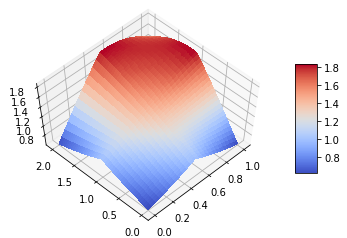

In [83]:
plotfig(X,T,f)

# Singular Value Decomposition

In [84]:
U,S,V = np.linalg.svd(f,full_matrices=False, compute_uv=True)
S=np.diag(S)
print(U.shape,S.shape,V.shape)

(25, 25) (25, 25) (25, 50)


Reconstruction with only first mode

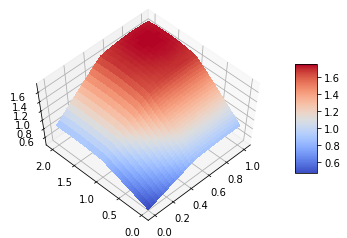

In [85]:
ff1 = np.matmul((np.matmul(U[:,0:1],S[0:1,0:1])),V[0:1,:])
plotfig(X,T,ff1)

Reconstruction with first two modes

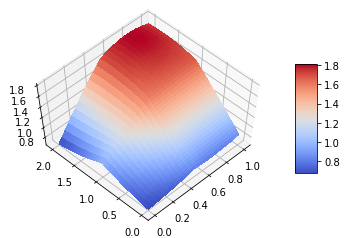

In [86]:
ff2 = np.matmul((np.matmul(U[:,0:2],S[0:2,0:2])),V[0:2,:])
plotfig(X,T,ff2)

Reconstruction with first three modes

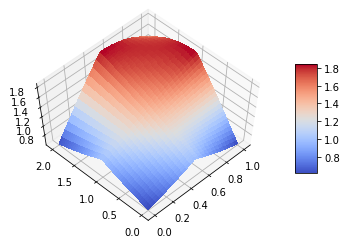

In [87]:
ff3 = np.matmul((np.matmul(U[:,0:3],S[0:3,0:3])),V[0:3,:])
plotfig(X,T,ff3)

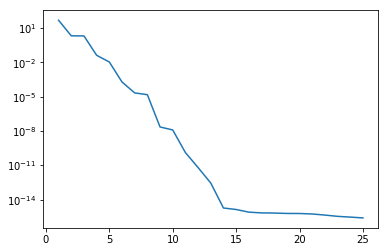

In [100]:
sig=np.diag(S)
xx=np.linspace(1,len(sig),len(sig))
plt.semilogy(xx,sig)
plt.show()

In [94]:
sig=np.diag(S)
xx=np.linspace(1,len(sig),len(sig))
plt.scatter(xx,sig)
plt.show()

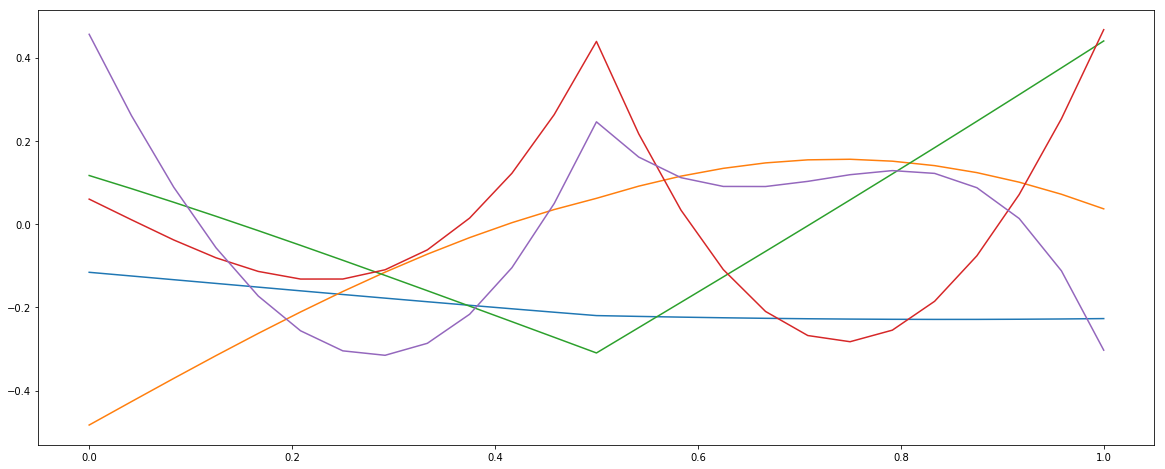

In [111]:
m,n=U.shape
plt.figure(figsize=(20,8))
for i in range(5):
    plt.plot(x,U[:,i])
plt.show()